# Real Box Office Data Exploration

This project analyzes a set of real box office data (provided by flatiron data science school) which includes information gathered from Box Office Mojo, IMDB, Rotten Tomatoes, ThemovieDB, and The Numbers in order to provide business insights for the investors looking to open a new movie studio.

## Data explaination

The data files used for the analysis are not included within this repository in order to reflect industry best practicies and to simulate the process I would follow if I were working with private and sensitive data. The zipped data can be obtained at the flatiron school repository which served as a model example for this project, accessible [here.](https://github.com/learn-co-curriculum/dsc-phase-2-project-v3/tree/gating/zippedData)

## Data exploration

I am not familiar with the structure or content of the majority of this data, so I am going to have to do a significant amount of work to visualize and see what's going on in it. This branch is a space where I will play with the data, explore the possibilities for my analysis, and decide which direction the project will take. I ended up loading up each avaliable source of data, deciding which parts of each set would be useful to my analysis, and pruning out everything that I believe will be ultimately unnecessary. I also generate some basic scatterplots to get a general idea of what relationships I might find between the variables I chose.

In [1]:
#import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import seaborn as sns
from pandasql import sqldf
from scipy import stats

My methodology for exploring the data will be to load each of my csv/tsv files into a separate dataframe and calculate basic descriptive statistics about them. I will also make a gridplot of their values to see if any trends are immediately jumping out. After I have dealt with the csv/tsv files, I will connect to my database file and explore it to determine if/how I can connect it to my other files and get useful information from it. I am starting with the Box Office Mojo (BOM) data.

### BOM

In [2]:
bomdf = pd.read_csv("data/bom.movie_gross.csv")
bomdf.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


This CSV contains the title of a movie, an abbreviation of the studio that made it, the year it was published, and both domestic and foreign gross return values. I would also like to look at some descriptive statistics of the data.

In [3]:
bomdf.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


There are definitely some interesting statistics to be found in the outliers of this data, but later analysis has shown that this data is redundant when considered alongside the other sources of data avaliable to me. I will not be using this dataset in my final analysis. Instead of diving in further now, I am going to move on to the next two files: the Rotten Tomatoes movie info and reviews TSV files.

### ROTTEN TOMATOES

In [4]:
rtrdf = pd.read_csv("data/rt.reviews.tsv", sep='\t', engine='python')
rtrdf

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [5]:
rtmidf = pd.read_csv("data/rt.movie_info.tsv", sep='\t', engine='python')
rtmidf

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


Originally, I encountered an error while trying to load the rotten tomatoes files that caused me to just move on and work on the other data first. 

With a little bit of experimentation, I was able to find out that I could solve the issue simply by specifying that the delimiter of the file was tabs instead of commas. This file contains information that is very interesting to me - my analysis will value the opinions of regular viewers much higher than critics (since they are the ones spending money on seeing the movie). The ratings and rotten/fresh column are really the only parts that are important to me, and I will probably end up dropping the actual text of the reivew.

However, it does occur to me that I may be able to attempt some natural language processing on the review column in order to transform it into a "sentiment" column, which will give me a more categorical analysis of how these individual moviegoers felt about each movie. I'll keep this in mind as I move 

### TMDB

In [6]:
tmdbdf = pd.read_csv("data/tmdb.movies.csv")
tmdbdf.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


The data contained in this file is much more complex and of a different type than the BOM data. It contains information about the genre of the movies that is coded by numbers, which I do not currently have the information I need to decode. It also contains information about the language of the movie, its original title, release title, and release dates, as well as three different metrics of audience approval, including a popularity score, vote average, and vote count. I am interested in descriptive statistics of these categories.

In [7]:
tmdbdf.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


There is definite some more very interesting data here. I am already thinking about how I am going to attempt to join this dataframe with the BOM dataframe to analyze popularity/genre against gross profits. For now, I want to also consider the data from The Numbers to see what interesting statistics I can find.

### THE NUMBERS

In [8]:
tndf = pd.read_csv("data/tn.movie_budgets.csv")
tndf.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
tndf.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


This file contains similar information to the BOM data, with a key difference: the BOM gross values are rounded, and the TN numbers are not. the TN dataset also contains 2k+ more records than the BOM data. It is also possible that they contain completely different subsets of movies, but I can't say for sure without further investigation. TN contains release date information, but it does not contain the name of the studio that produced the information. A little further down the line, I will do some tests to figure out what the overlap between these two data sets are, and if the overlap is significant, I will probably just throw the BOM data out - the only information it can offer me is the name of the studio that made the movie, and I do not think that making predictions based on the studio that produced a movie is going to be helpful to my shareholders.

The next step is to load up the imdb sql database and get a feel for its structure and content.

### IMDB SQL DATABASE
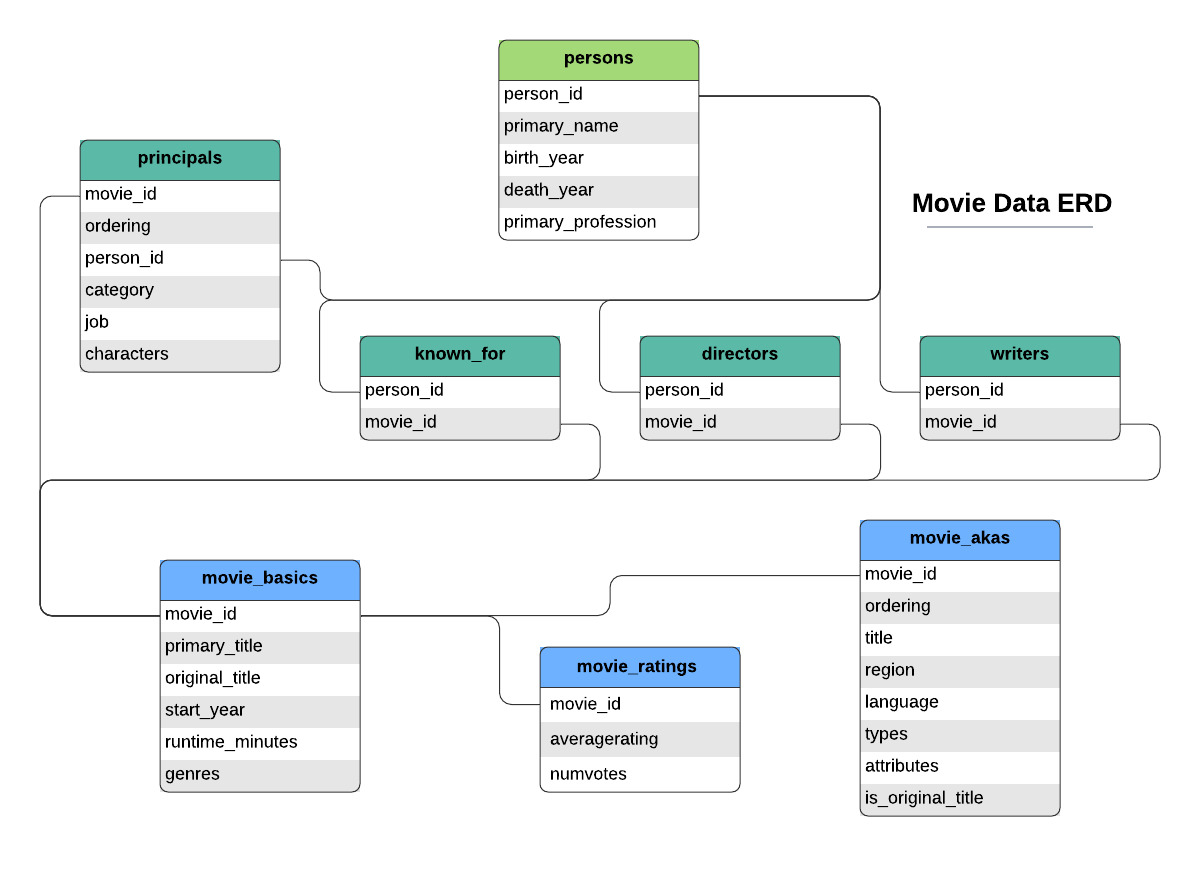
This picture is a map of the structure of the SQL database. This is mostly here just to allow me to easily reference it while I am working.

I am mostly interested in the content of the principals, movie basics, movie akas, and movie ratings tables, so this exploration will focus on them.

In [10]:
conn = sqlite3.connect('data/im.db')
q = """
SELECT * 
  FROM principals
"""
principalsdf = pd.read_sql(q, conn)
principalsdf

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


Based on the result of that query, I think I need to be really careful with this table in particular. It contains multiple entries for each movie, and a lot of entires overall - this table seems to be the full cast of each movie. That isn't really relevant to the analysis I want to do in any way, so I think it's reasonable for me to ignore this table, as well as the other tables related to the cast/directors/crew of the movies. 

I am also interested in whether or not the information in the movie akas table will be useful to me, so I'm just going to display it here and try to get a good idea of what the range of values in each category is.

In [11]:
q = """
SELECT *
  FROM movie_akas
"""

akasdf = pd.read_sql(q, conn)
akasdf

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [12]:
akasdf['attributes'].value_counts()

new title                      1700
alternative spelling           1394
literal English title          1054
complete title                 1034
original subtitled version      879
                               ... 
TV listings title                 1
X-rated version                   1
first season title                1
8mm release title                 1
reissue titleshort version       1
Name: attributes, Length: 77, dtype: int64

It looks like the "title" column is the translated name that was given to each movie in different regions. There are multiple entries for each movie, one for each region. The attributes column seems to be an indicator of any special attributes the movie may have, such as being the original version (to make distinct from other versions that came later). 

In [13]:
q = """
SELECT primary_title, runtime_minutes, genres, averagerating AS IMDBrating, numvotes AS IMDBnumvotes, COUNT(DISTINCT region) AS num_markets
  FROM movie_basics as MB
  JOIN movie_ratings as MR
      USING(movie_id)
  JOIN movie_akas
      USING(movie_id)
GROUP BY primary_title
"""
imdbdf = pd.read_sql(q, conn)
imdbdf.set_index('primary_title', inplace=True)
imdbdf

,runtime_minutes,genres,IMDBrating,IMDBnumvotes,num_markets
primary_title,,,,,
!Women Art Revolution,83.0,Documentary,6.9,196,3
#1 Serial Killer,87.0,Horror,5.6,40,1
#5,68.0,"Biography,Comedy,Fantasy",6.8,6,1
#66,116.0,Action,5.3,18,1
#BKKY,75.0,Drama,7.4,23,1
...,...,...,...,...,...
Üç Harfliler 3: Karabüyü,87.0,Horror,6.8,730,1
"Üç, Iki, Bir... Kestik!",92.0,Comedy,4.3,88,1
à propos: philosophie,80.0,Documentary,8.2,5,1


This table contains all the data that I need from the imdb sql database. All that's left for me to do now in this exploration branch is to combine the most useful pieces of data from all the tables together into a single table and make some visualizations to illustrate the trends that I hope to find. I hope to directly re-use this code in the main branch of the project.

### Trimming and combining

The first step I will take is to trim all of my dataframes down to just the information I plan to use and then join them. The rotten tomatoes review data will be more difficult and will require me to aggregate review data before I can join it with the other information. In addition, my original plan was to join the dataframes based on the titles of the movies alone, but the rotten tomatoes review data is missing the titles of the movies, so I will need to find another way of doing it.

In [14]:
tmdbdf.drop(columns=['id', 'Unnamed: 0', 'genre_ids', 'release_date'], inplace=True)
# Changing the name of the columns so that it will be easier for me to keep track of which review scores came from which source
tmdbdf.columns = ['original_language', 'original_title', 'popularity', 'title', 'TMDBvote_average', 'TMDBvote_count']
# Set index to movie title to make joins easier
tmdbdf.set_index('original_title', inplace=True)

In [15]:
tndf.drop(columns='id', inplace=True)
tndf.set_index('movie', inplace=True)

In [16]:
# Now to join this data together and critically think about how I can further trim it. I have decided to use an inner join to
# minimize the amount of NaN entries.
giantdf = tndf.join([tmdbdf, imdbdf], how='inner')
giantdf.head()

,release_date,production_budget,domestic_gross,worldwide_gross,original_language,popularity,title,TMDBvote_average,TMDBvote_count,runtime_minutes,genres,IMDBrating,IMDBnumvotes,num_markets
#Horror,"Nov 20, 2015","$1,500,000",$0,$0,de,6.099,#Horror,3.3,102,101.0,"Crime,Drama,Horror",3.0,3092,3
10 Cloverfield Lane,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422",en,17.892,10 Cloverfield Lane,6.9,4629,103.0,"Drama,Horror,Mystery",7.2,260383,25
10 Days in a Madhouse,"Nov 11, 2015","$12,000,000","$14,616","$14,616",en,0.955,10 Days in a Madhouse,5.4,7,111.0,Drama,6.7,1114,2
12 Strong,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378",en,13.183,12 Strong,5.6,1312,130.0,"Action,Drama,History",6.6,50155,26
12 Years a Slave,"Oct 18, 2013","$20,000,000","$56,671,993","$181,025,343",en,16.493,12 Years a Slave,7.9,6631,134.0,"Biography,Drama,History",8.1,577301,32


Now that's a LOT of columns. I do not plan to use all of them (in fact, some are included just so that I can calculate a statistic using them and then delete them) so plenty of more pruning needs to be done.

In [17]:
# Duplicate column
giantdf.drop(columns='title', inplace=True)

At this point, I am also really wanting to include the rotten tomatoes data just because it contains age ratings for the movies, which I believe may be corrlelated with gross profit. The best way I can think to do this is to check and see if all the release dates I have in both dataframes are unique and use that as the join column.

In [18]:
giantdf['release_date'].value_counts()

Nov 20, 2015    17
Dec 31, 2014    13
Nov 18, 2016    12
Oct 23, 2015    11
Oct 16, 2015    10
                ..
Jun 10, 2014     1
Nov 19, 1982     1
May 28, 2010     1
Jun 23, 2017     1
Sep 29, 2000     1
Name: release_date, Length: 774, dtype: int64

In [19]:
rtmidf['theater_date'].value_counts()

Jan 1, 1987     8
Jan 1, 1994     5
Jan 1, 1967     4
Jan 1, 1940     4
Jun 1, 1994     4
               ..
Dec 31, 2000    1
Feb 6, 1992     1
Oct 15, 1965    1
Jan 11, 2008    1
Nov 13, 1998    1
Name: theater_date, Length: 1025, dtype: int64

In [20]:
giantdf['release_date'].isin(rtmidf['theater_date']).value_counts()

False    1522
True      618
Name: release_date, dtype: int64

Based on that exploration, I'm going to make the determination that it is not worth it to include the rotten tomatoes data because it would require me to exclude far too many records for me to still have a good model of the success of future movies. However, with just the number of foreign markets each movie was released in, two metrics of user approval, a list of movie genres, and a popularity score from TMDB I am confident that I will be able to give four total concrete recommendations for a new movie studio. Instead, I will compute the missing summary statistics and trim the dataframe.

The main thing I want to acomplish here is to calculate the real profit of each movie in my data, but there just one problem: the gross figures are stored as strings instead of numbers. I will likely need to do a list comprehension to fix this.

In [21]:
# Remove the dollar signs and commas, then convert data type to integer
giantdf['worldwide_gross'] = giantdf['worldwide_gross'].map(lambda x: int(x.replace(",", "")[1:]))
giantdf['production_budget'] = giantdf['production_budget'].map(lambda x: int(x.replace(",", "")[1:]))
# Calculate the new profit column: worldwide gross - production budget
giantdf['profit'] = giantdf['worldwide_gross'] - giantdf['production_budget'] 

In [22]:
# The production budget, domestic gross, and worldwide gross columns are all completely superfluous now that I have this statistic,
# So I am going to nuke them from orbit to make this dataframe a little bit easier to read.
giantdf.drop(columns=['domestic_gross', 'worldwide_gross'], inplace=True)
giantdf.head()

,release_date,production_budget,original_language,popularity,TMDBvote_average,TMDBvote_count,runtime_minutes,genres,IMDBrating,IMDBnumvotes,num_markets,profit
#Horror,"Nov 20, 2015",1500000,de,6.099,3.3,102,101.0,"Crime,Drama,Horror",3.0,3092,3,-1500000
10 Cloverfield Lane,"Mar 11, 2016",5000000,en,17.892,6.9,4629,103.0,"Drama,Horror,Mystery",7.2,260383,25,103286422
10 Days in a Madhouse,"Nov 11, 2015",12000000,en,0.955,5.4,7,111.0,Drama,6.7,1114,2,-11985384
12 Strong,"Jan 19, 2018",35000000,en,13.183,5.6,1312,130.0,"Action,Drama,History",6.6,50155,26,36118378
12 Years a Slave,"Oct 18, 2013",20000000,en,16.493,7.9,6631,134.0,"Biography,Drama,History",8.1,577301,32,161025343


Awesome. With that done, I can generate a few basic scatterplots to get a little bit of an idea of how my chosen statistics may be able to predict the profit generated by a movie.

### Graphs, graphs, and more graphs

<AxesSubplot:xlabel='production_budget', ylabel='profit'>

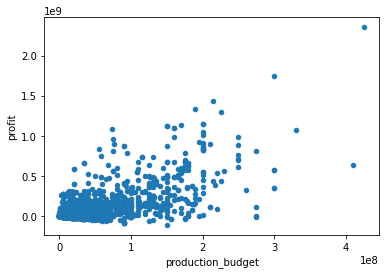

In [23]:
giantdf.plot.scatter(x='production_budget', y='profit')

It looks like there is a somewhat linear relationship between production budget and profit, which is absolutely what we expect to see.

<AxesSubplot:xlabel='popularity', ylabel='profit'>

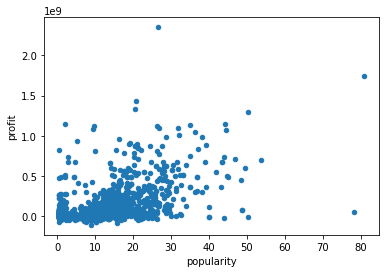

In [24]:
giantdf.plot.scatter(x='popularity', y='profit')

Popularity also seems to be a decent predictor of profit.

<AxesSubplot:xlabel='TMDBvote_average', ylabel='profit'>

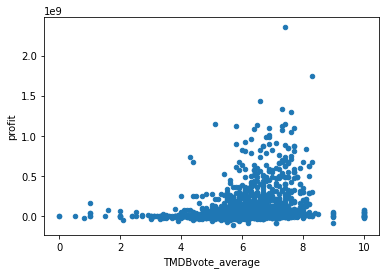

In [25]:
giantdf.plot.scatter(x='TMDBvote_average', y='profit')

It's hard to say for certain if there is a strong relationship between average score on TMDB and profit here. It looks like it may be some sort of exponential graph.

<AxesSubplot:xlabel='IMDBrating', ylabel='profit'>

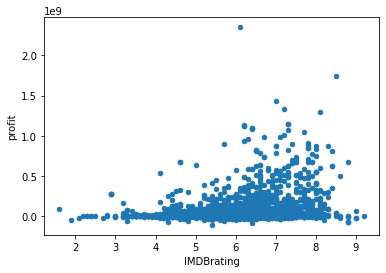

In [26]:
giantdf.plot.scatter(x='IMDBrating', y='profit')

IMDB ratings are a similar story to TMDB ratings. It looks like there may be an exponential relationship, but it is difficult to say for certain what the corresponding increase in profit is for each point of average rating without constructing a linear regression model.

<AxesSubplot:xlabel='runtime_minutes', ylabel='profit'>

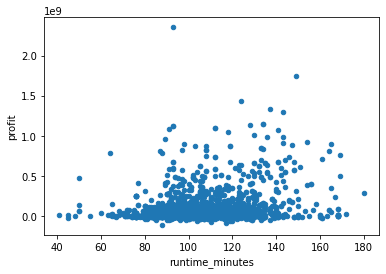

In [27]:
giantdf.plot.scatter(x='runtime_minutes', y='profit')

This is the most random looking graph so far. It looks like there is not a relationship between the number of runtime minutes and profit.

<AxesSubplot:xlabel='num_markets', ylabel='profit'>

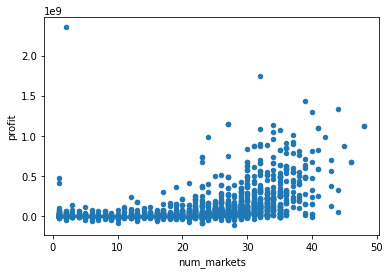

In [28]:
giantdf.plot.scatter(x='num_markets', y='profit')

There does seem to be a linear relationship between the number of markets a movie was released in and the real profit of the movie. 

I am also interested in whether the production budget of a movie affects the average ratings, so I will check that as well.

<AxesSubplot:xlabel='production_budget', ylabel='TMDBvote_average'>

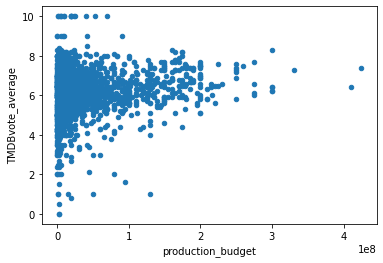

In [29]:
giantdf.plot.scatter(x='production_budget', y='TMDBvote_average')

This looks like a logarithmic relationship. It seems that the increase in ratings that you get from production budget starts to flatten out around $10,000,000 spent USD. I'll check the IMDB scores as well to see if they confirm this relationship.

<AxesSubplot:xlabel='production_budget', ylabel='IMDBrating'>

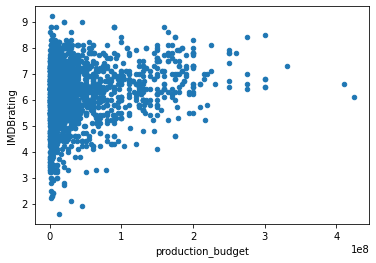

In [31]:
giantdf.plot.scatter(x='production_budget', y='IMDBrating')

This relationship looks slightly less logarithmic, but increasing production budget still does seem to increase the average ratings of the movie. 

## TO DO LIST:
- bar graph of average profit by genre
- bar graph of average profit by original language

# Conclusion

With this informal exploration of the data, I believe that I have uncovered strong enough evidence of correlations between factors in the data and profit to begin my analysis. I will re-use the code from this branch that generated the large DF to re-create it in the main branch, and then begin the data cleaning and analysis process from there.